# Intelligent Systems
# Exercise 07 / Similarities
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

In [15]:
import scipy.spatial.distance as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

-----

In [3]:
# Nothing to do here
def path_cost(A, B, accumulated_cost, distances):
    """Method for backtrackign algorithm and calculation of overall distance."""
    
    path = [[len(A)-1, len(B)-1]]
    cost = 0
    i = len(B)-1
    j = len(A)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [B, A] in path:
        cost = cost +distances[A, B]
    return path, cost 

In [4]:
# Nothing ot do here
def distance_cost_heatmap(distances):
    """Helper method to plot distance matrix as heatmap."""
        
    im = plt.imshow(distances, interpolation='nearest', cmap="Reds") 
    plt.gca().invert_yaxis()
    plt.xlabel("A")
    plt.ylabel("B")
    plt.grid()
    plt.colorbar()
    plt.show()

In [5]:
# Nothing to do here
def plot_dtw_distances(A, B, accumulated_cost, distances):
    """Helper method for plotting DTW distnaces."""
    
    plt.plot(A, 'bo-' ,label='A')
    plt.plot(B, 'g^-', label = 'B')
    plt.legend()
    paths = path_cost(A, B, accumulated_cost, distances)[0]
    for [map_a, map_b] in paths:  
        plt.plot([map_a, map_b], [A[map_a], B[map_b]], 'r')
    plt.show()

----

In [6]:
# Two Time Series
A = [1, 1, 1, 3, 5, 3, 0, -3, -5, -3, 1, 1]
B = [1, 3, 5, 3, 0, -3, -5, -3, 1, 1, 1, 1]

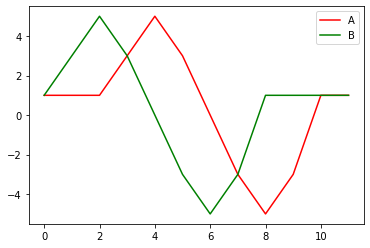

In [7]:
plt.plot(A,'r', label='A')
plt.plot(B, 'g', label='B')
plt.legend()
plt.show()

# 1. Calculate the similarity of the two time series

In [30]:
# Perform distance measurements 
total = 0
for i in range(0, len(A)):
    total += ((A[i] - B[i]) * (A[i] - B[i]))
print(math.sqrt(total))

#Two Time Series
# A = [1, 1, 1, 3, 5, 3, 0, -3, -5, -3, 1, 1]
# B = [1, 3, 5, 3, 0, -3, -5, -3, 1, 1, 1, 1]
#Euclidean distance 12.569805089976535   
#ManHutton Distance 32

12.569805089976535


In [31]:
# Perform distance measurements 



Distance measurements with 10-dimensional vectors
-------------------------------------------------

Euclidean distance is 10.1980390272
Manhattan distance is 20
Chebyshev distance is 7
Canberra distance is 5.0
Cosine distance is 1.48891771226


### Implementiere als nächstes den DTW Algorithmus und Vergleiche die Ergebnisse aus Schritt eins. Warum ist die Verwendung von DTW hier sinnvoll?


# 2. Use Dynamic Time Warping

Dynamic Time Warning (DTW) seeks an optimal alignment between the two time series without assuming that the underlying processes happened at the same <b>speed</b> or for the same amount of time. In other words, the DTW algorithm stretches or compresses two non-linear sequences in making its comparison. This makes it possible to find similarities between sequences that have differences in length, are not in phase, and/or are warped representations of each other:

![title](dtw.jpg)

## 2.1. DTW - Create distance matrix

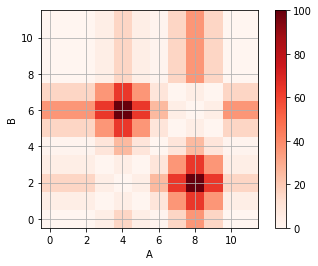

In [17]:
distance_cost_heatmap(distances)

## 2.2 DTW - Create accumulated cost matrix

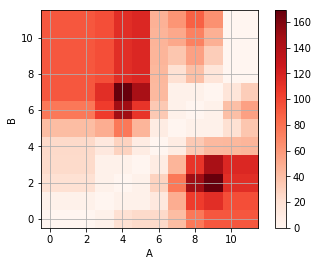

In [20]:
distance_cost_heatmap(accumulated_cost)

## 2.3 DTW - Find Backtracking path 

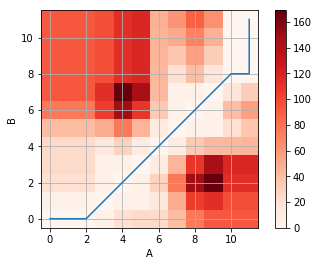

In [22]:
plt.plot(path_a, path_b)
distance_cost_heatmap(accumulated_cost)

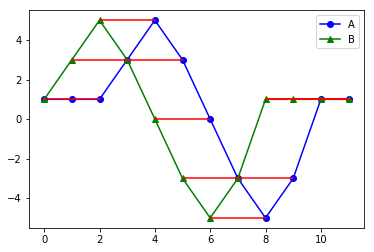

In [23]:
plot_dtw_distances(A, B , accumulated_cost, distances)